## Comandos de configuração do ambiente Jupiter - IDE[VS Code]

#### Linux (Ubuntu 24.04)
**criando o ambiente virtual:**

`python3 -m venv venv`

**baixando dependências do projeto:**

`pip install -r requirements.txt`

# Importando Pacotes

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.ion()

# Acessando Base de Dados

Os dados apresentados foram retirados do site https://www.kaggle.com/ e a base pode ser obtida através do link abaixo:

`https://www.kaggle.com/datasets/muhammadehsan02/healthcare-prediction-dataset`

In [21]:
df = pd.read_csv('./healthcare_prediction_dataset.csv')
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


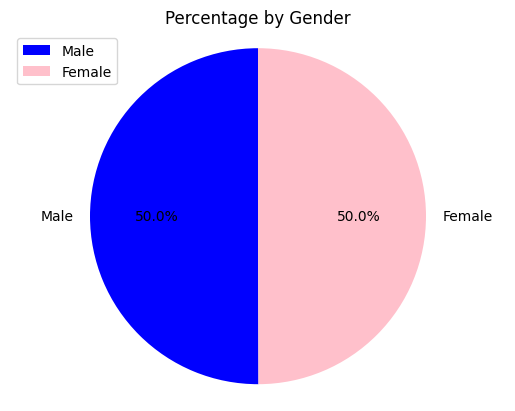

In [46]:
total = len(df)
total_male = (len(df[df['Gender'] == 'Male']) * 100) / total
total_female = (len(df[df['Gender'] == 'Female']) * 100) / total

plt.pie([total_male, total_female], labels=["Male", "Female"], colors=['blue', 'pink'], autopct='%1.1f%%', startangle=90)
plt.title("Percentage by Gender")
plt.legend(loc='upper left', )
plt.axis('equal')
plt.show()

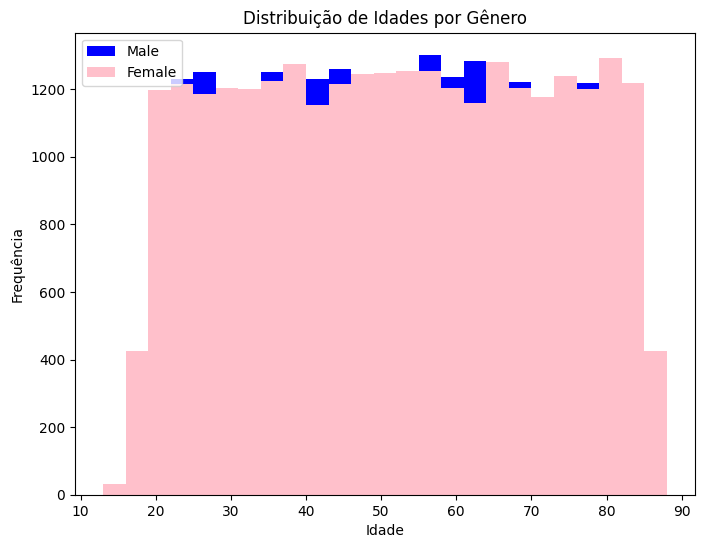

In [55]:
total = len(df)
male_ages = df[df['Gender'] == 'Male']["Age"]
female_ages = df[df['Gender'] == 'Female']["Age"]

plt.figure(figsize=(8, 6))

# Criar histograma para homens e mulheres
plt.hist(male_ages, bins=np.arange(male_ages.min(), male_ages.max(), 3), alpha=1, label='Male', color='blue')
plt.hist(female_ages, bins=np.arange(female_ages.min(), female_ages.max(), 3), alpha=1, label='Female', color='pink')

# Adicionando título e legendas
plt.title('Distribuição de Idades por Gênero')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.legend()

# Mostrando o gráfico
plt.show()

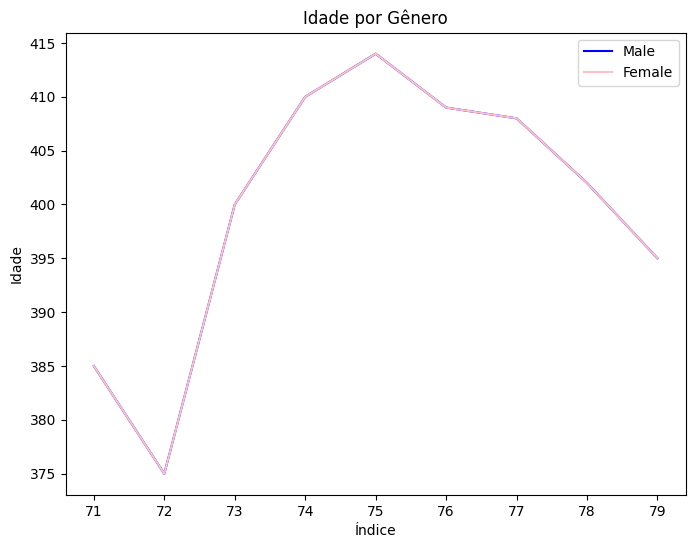

In [87]:
# max_age = df["Age"].max()
# min_age = df["Age"].min()
# print(max_age, min_age)
# fig, ax = plt.subplots()
# bins = np.arange(min_age, max_age, 1)
# print(bins)
# ax.plot(bins, female_ages, label="Female")
# ax.plot(bins, male_ages, label="Male")

# Separando as idades por gênero
# male_ages = df[df['Gender'] == 'Male']['Age'].sort_values()
# female_ages = df[df['Gender'] == 'Female']['Age'].sort_values()
# print(male_ages)

# Criando um array para o eixo x (índices das idades)
# x_male = np.arange(1, len(male_ages) + 1)
# x_female = np.arange(1, len(female_ages) + 1)

df_male = df[(df['Gender'] == 'Male') & (df['Age'] > 70) | (df['Age'] < 40)]
df_female = df[df['Gender'] == 'Female']
age_count_male = df_male['Age'].value_counts().sort_index()
age_count_female = df_male['Age'].value_counts().sort_index()

# Criando o gráfico de linha
plt.figure(figsize=(8, 6))

# Plotando as linhas para homens e mulheres
plt.plot(age_count_male.index, age_count_male.values, label='Male',linestyle='-', color='blue')
plt.plot(age_count_female.index, age_count_female.values, label='Female',  linestyle='-',color='pink')

# Adicionando título e legendas
plt.title('Idade por Gênero')
plt.xlabel('Índice')
plt.ylabel('Idade')
plt.legend()

In [84]:
df_male = 
print(df)


                   Name  Age Gender Blood Type Medical Condition  \
1          LesLie TErRy   62   Male         A+           Obesity   
10     mIchElLe daniELs   72   Male         O+            Cancer   
19       dANIEL schmIdt   63   Male         B+            Asthma   
25     PeTER fiTzgeRaLd   73   Male        AB+           Obesity   
32       WilLIAM cOOPEr   78   Male        AB-         Arthritis   
...                 ...  ...    ...        ...               ...   
55448    tIFfANy miller   78   Male         B-            Cancer   
55458  TimOTHy reynOldS   71   Male         A-      Hypertension   
55461    connOR coMPTon   63   Male         A+            Asthma   
55489    ANdrEw AGUIlaR   69   Male         O-         Arthritis   
55494     JEssIcA WHiTe   67   Male         O+         Arthritis   

      Date of Admission            Doctor                    Hospital  \
1            2019-08-20   Samantha Davies                     Kim Inc   
10           2020-04-19       John Du